In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

## MANUAL CONFIGURATION OF PERCENTAGES FOR EACH COUNTRY

In [14]:
# Data extracted from Excel files

df = pd.DataFrame({
'group': ['COLOMBIA','CHILE','BRASIL','UNITED STATES','ALL COUNTRIES'],
'REFACTORING': [                24.9, 23.8, 26.2, 18.9,  24.0],
'IMPROVE TESTING': [            4.9,  7.9,  4.9,  8.1,   9.5],
'ADOPTION OF GOOD PRACTICES': [ 4.9,  6.3,  6.6,  2.7,   5.3],
'REPAYMENT ACTIVITIES': [       2.9,  6.3,  1.6,  16.2,  5.3],
'IMPROVE DESIGN': [             9.8,  1.6,  0.0,  5.4,   4.9]
})

In [15]:
df.head()

,group,REFACTORING,IMPROVE TESTING,ADOPTION OF GOOD PRACTICES,REPAYMENT ACTIVITIES,IMPROVE DESIGN
0,COLOMBIA,24.9,4.9,4.9,2.9,9.8
1,CHILE,23.8,7.9,6.3,6.3,1.6
2,BRASIL,26.2,4.9,6.6,1.6,0.0
3,UNITED STATES,18.9,8.1,2.7,16.2,5.4
4,ALL COUNTRIES,24.0,9.5,5.3,5.3,4.9


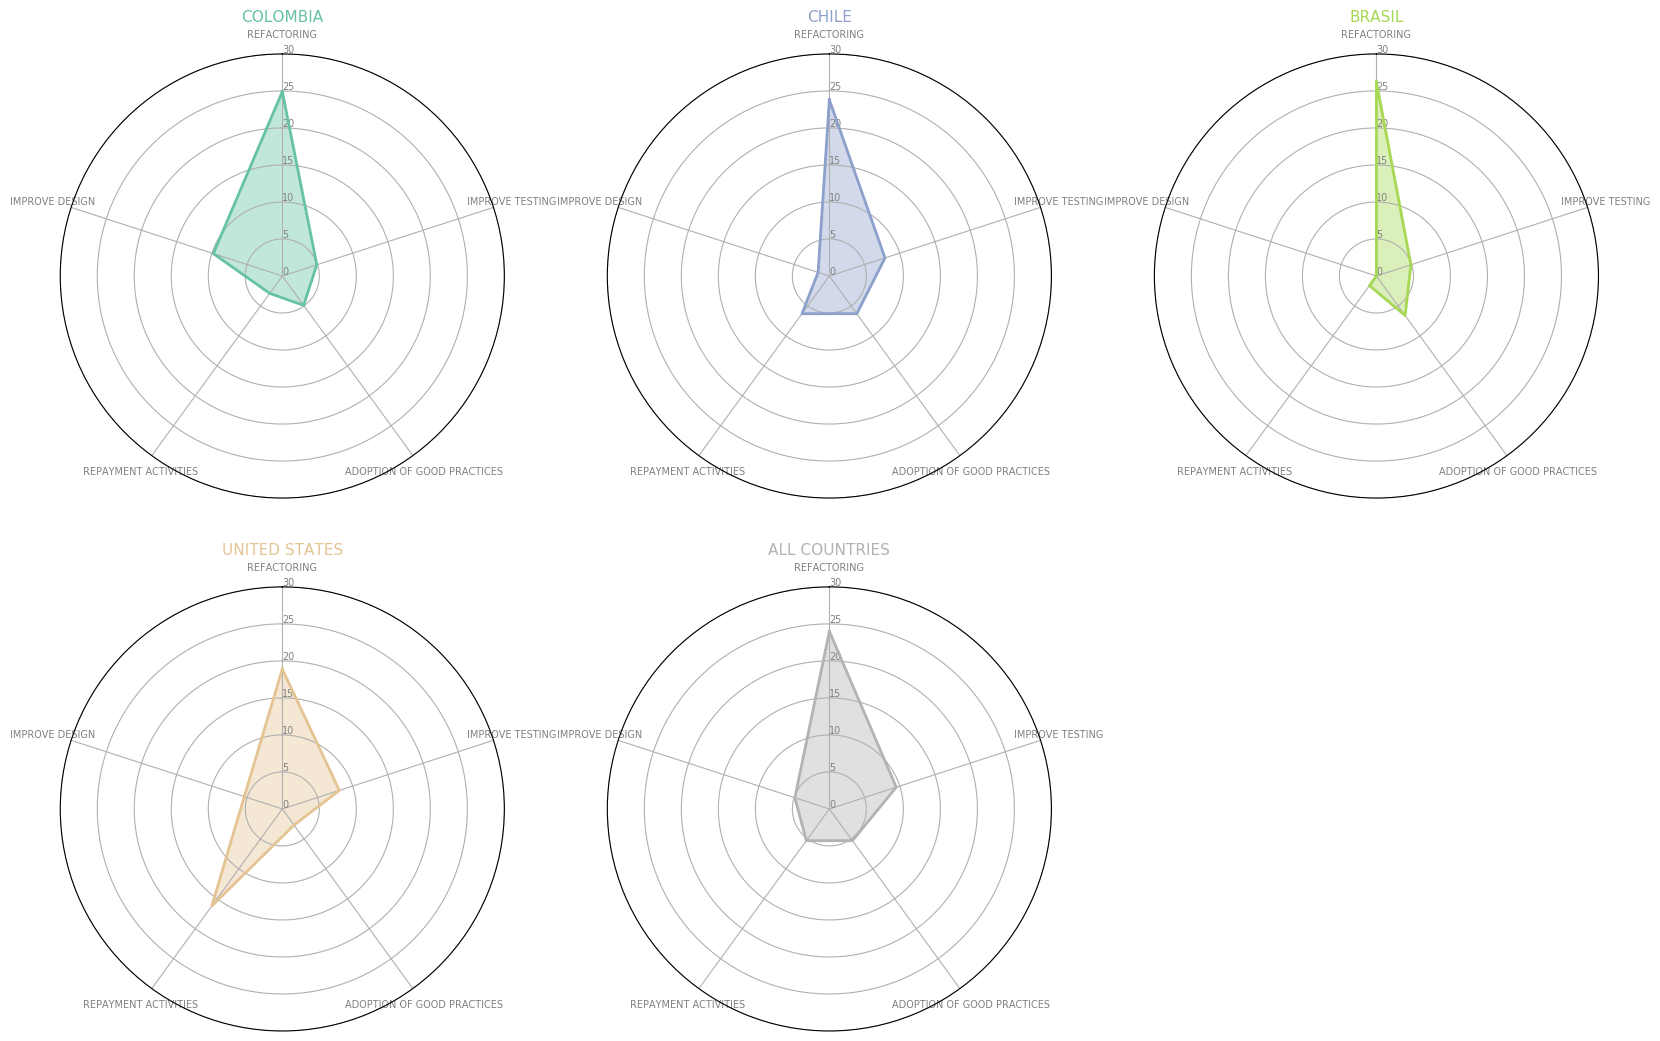

In [16]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
  # number of variable
  categories=list(df)[1:]
  N = len(categories)
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot
  ax = plt.subplot(3,3,row+1, polar=True, )
  
  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
  
  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories, color='grey', size=7)
  
  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([0,5,10,15,20,25,30], ["0","5","10","15","20","25","30"], color="grey", size=7)
  plt.ylim(0,30)
  
  # Ind1
  values=df.loc[row].drop('group').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)
  
  # Add a title
  plt.title(title, size=11, color=color, y=1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=100
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
  make_spider( row=row, title=df['group'][row], color=my_palette(row))
